<a href="https://colab.research.google.com/github/pruthvi-bariti/Natural-Language-Processing/blob/main/Spam_Detector_using_Text_Processing_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Detector using Text Pre processing and Machine Learning**

Data Dictionary:

Text : The message

Type : Spam or Ham

**Since TYPE field exists, we will use Supervised Learning Classification**

In [6]:
import pandas as pd # For dataframes

In [7]:
import matplotlib as plt #For visualization
import seaborn as sns

In [8]:
#To display images

from PIL import Image

In [9]:
# to extract regular expressions

import re

In [10]:
# to remove punctuations
import string

In [11]:
!pip install unidecode
!pip install autocorrect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=08a2c5afcc78aeedf280cb193fb67072431b0b411682c3f4067f1c2e91fdc64d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [12]:
# to remove accented words
import unidecode

In [13]:
# to correct spellings

from autocorrect import Speller

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') #Lemmetization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
# importing NLTK libraries
from nltk.corpus import stopwords #for stopwords
from nltk.tokenize import word_tokenize, sent_tokenize #for tokenizing
#for stemming
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
#for lemmatizer
from nltk.stem import WordNetLemmatizer

In [16]:
#for spaCy
import spacy
nlp=spacy.load('en_core_web_sm')

In [17]:
from spacy.lang.en import English
en_nlp=English()

In [18]:
#Importing the RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [19]:
#Importing for train test split

from sklearn.model_selection import train_test_split

In [20]:
#Import to check metrics

from sklearn.metrics import accuracy_score, classification_report

Loading the DataSet

In [21]:
from google.colab import drive

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd

In [24]:
text=pd.read_csv('/content/drive/MyDrive/CSV Files/sms_spam.csv')

In [25]:
#Creating a copy of the dataset

text_copy=text.copy()

In [26]:
text.head()


,type,text
0,ham,Hope you are having a good week. Just checking...
1,ham,K..going bacckk to stävänger
2,ham,Am also dong in cbe ony. Bt have to pay
3,ham,Are you this much buzy
4,ham,Please ask mummy to call father


In [27]:
text.tail()

,type,text
5055,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
5056,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
5057,spam,Ur balance is now £500. Ur next question is: W...
5058,spam,"If you don't, your prize will go to another cu..."
5059,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


Understand the Data

In [28]:
text.shape

(5060, 2)

In [29]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5060 non-null   object
 1   text    5060 non-null   object
dtypes: object(2)
memory usage: 79.2+ KB


Check for duplicates

In [30]:
text.duplicated().sum()

383

In [31]:
text=text.drop_duplicates(keep='first') #keep='first' is the first occurrance

In [32]:
text.duplicated().sum() #Checking duplicates again

0

In [33]:
#resetting the index of dataframe
text.reset_index(inplace=True)

In [34]:
text.head()

,index,type,text
0,0,ham,Hope you are having a good week. Just checking...
1,1,ham,K..going bacckk to stävänger
2,2,ham,Am also dong in cbe ony. Bt have to pay
3,3,ham,Are you this much buzy
4,4,ham,Please ask mummy to call father


**Exploratory Data Analysis**

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

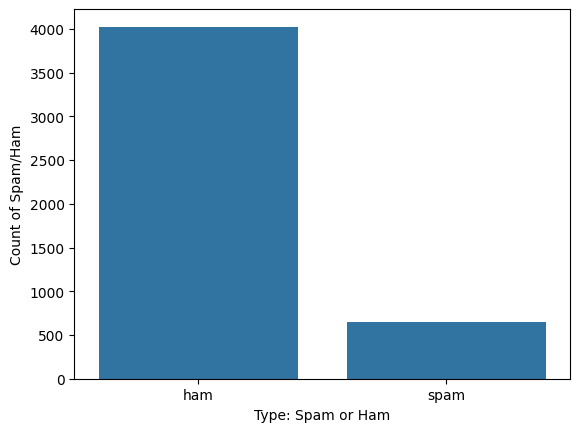

In [36]:
sns.countplot(x='type', data=text)
plt.xlabel('Type: Spam or Ham')
plt.ylabel('Count of Spam/Ham')
plt.show()

It is evident that chances of Spam is very less

In [37]:
print(text['type'].value_counts(normalize=True)) #Normalize=True for percentage

type
ham     0.860381
spam    0.139619
Name: proportion, dtype: float64


Checking random messages to see decide what kinds of text pre processing has to be done

In [38]:
text['text'][10]

"K I'll be sure to get up before noon and see what's what"

In [39]:
text['text'][18]

'Could you not read me, my Love ? I answered you'

In [40]:
text['text'][191]

'S..antha num corrct dane'

In [41]:
text['text'][99]

'Please dont say like that. Hi hi hi'

In [42]:
text['text'][1000]

'Thanks for being there for me just to talk to on saturday. You are very dear to me. I cherish having you as a brother and role model.'

In [43]:
text['text'][528]

"Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!"

In [44]:
text['text'][4333]

'Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394973 from Landline DATEBox1282EssexCM61XN 150p/min 18'

It has inflections, misspellings, lower case and upper case issues etc,.

Lets try to build a Random Forest Classifier without Text Processing

In [45]:
unclean_data=text.copy()

In [46]:
X=unclean_data['text']
y=unclean_data['type']

In [47]:
X=pd.get_dummies(X, drop_first=True) #One hot encoding

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [50]:
#Shape of training and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3741, 4676)
(936, 4676)
(3741,)
(936,)


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model=RandomForestClassifier(random_state=1) #Initializing the model

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [54]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [56]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.86      0.92       936
        spam       0.00      0.00      0.00         0

    accuracy                           0.86       936
   macro avg       0.50      0.43      0.46       936
weighted avg       1.00      0.86      0.92       936



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
print(accuracy_score(y_test, y_pred)) # Changed X_test to y_test

0.8600427350427351


***NOW WITH TEXT PREPROCESSING***

Removing accented characters using **UNIDECODE**

In [58]:
text.shape[0]

4677

In [59]:
text.head()

,index,type,text
0,0,ham,Hope you are having a good week. Just checking...
1,1,ham,K..going bacckk to stävänger
2,2,ham,Am also dong in cbe ony. Bt have to pay
3,3,ham,Are you this much buzy
4,4,ham,Please ask mummy to call father


In [60]:
after_accented=[]
for i in range(text.shape[0]):
  to_words=text['text'][i].split()
  accented=[unidecode.unidecode(word) for word in to_words]
  accented=' '.join(accented) #Converting back to sentence
  after_accented.append(accented)
text['Accented Text']=after_accented

In [61]:
text.head()

,index,type,text,Accented Text
0,0,ham,Hope you are having a good week. Just checking...,Hope you are having a good week. Just checking...
1,1,ham,K..going bacckk to stävänger,K..going bacckk to stavanger
2,2,ham,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe ony. Bt have to pay
3,3,ham,Are you this much buzy,Are you this much buzy
4,4,ham,Please ask mummy to call father,Please ask mummy to call father


In [65]:
text.loc[[0,3],['text','type', 'Accented Text']]

,text,type,Accented Text
0,Hope you are having a good week. Just checking...,ham,Hope you are having a good week. Just checking...
3,Are you this much buzy,ham,Are you this much buzy


Removing special characters using isalnum()

In [67]:
for_alpha=[]
for i in range(text.shape[0]):
  test_text=text['Accented Text'][i].split()
  removed_spl_char=[word for word in test_text if word.isalnum()]
  removed_spl_char=' '.join(removed_spl_char)
  for_alpha.append(removed_spl_char)


In [68]:
text['cleaned data']=for_alpha

In [69]:
text.head()

,index,type,text,Accented Text,cleaned data
0,0,ham,Hope you are having a good week. Just checking...,Hope you are having a good week. Just checking...,Hope you are having a good Just checking in no no
1,1,ham,K..going bacckk to stävänger,K..going bacckk to stavanger,bacckk to stavanger
2,2,ham,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe Bt have to pay
3,3,ham,Are you this much buzy,Are you this much buzy,Are you this much buzy
4,4,ham,Please ask mummy to call father,Please ask mummy to call father,Please ask mummy to call father


In [72]:
text.drop('Accented Text', axis=1, inplace=True)

In [73]:
text.head()

,index,type,text,cleaned data
0,0,ham,Hope you are having a good week. Just checking...,Hope you are having a good Just checking in no no
1,1,ham,K..going bacckk to stävänger,bacckk to stavanger
2,2,ham,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe Bt have to pay
3,3,ham,Are you this much buzy,Are you this much buzy
4,4,ham,Please ask mummy to call father,Please ask mummy to call father


Lowercasing using lower()

In [80]:
lower_text=[]
for i in range(text.shape[0]):
  low_txt=text['cleaned data'][i].lower()
  lower_text.append(low_txt)

In [86]:
text['cleaned text']=lower_text

In [87]:
text.head()

,index,type,text,cleaned text
0,0,ham,Hope you are having a good week. Just checking...,hope you are having a good just checking in no no
1,1,ham,K..going bacckk to stävänger,bacckk to stavanger
2,2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe bt have to pay
3,3,ham,Are you this much buzy,are you this much buzy
4,4,ham,Please ask mummy to call father,please ask mummy to call father


In [84]:
text.drop('cleaned data', axis=1, inplace=True)

In [88]:
text.head()

,index,type,text,cleaned text
0,0,ham,Hope you are having a good week. Just checking...,hope you are having a good just checking in no no
1,1,ham,K..going bacckk to stävänger,bacckk to stavanger
2,2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe bt have to pay
3,3,ham,Are you this much buzy,are you this much buzy
4,4,ham,Please ask mummy to call father,please ask mummy to call father


Stripping Extra Spaces

In [89]:
extra_space=[]
for i in range(text.shape[0]):
  ext_sp=text['cleaned text'][i].strip()
  extra_space.append(ext_sp)
text['cleaned text']=extra_space

In [90]:
text.head()

,index,type,text,cleaned text
0,0,ham,Hope you are having a good week. Just checking...,hope you are having a good just checking in no no
1,1,ham,K..going bacckk to stävänger,bacckk to stavanger
2,2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe bt have to pay
3,3,ham,Are you this much buzy,are you this much buzy
4,4,ham,Please ask mummy to call father,please ask mummy to call father


Spell Checking using Speller(lang='eng')

In [92]:
# Letsn define a function to auto correct, but lets download and initialize a speller)
!pip install autocorrect

In [94]:
speller=Speller(lang='en')

In [96]:
#Defining a function to autocorrect/autospell
def autospell(text):
  text_for_spell=text.split()
  auto_spelled=[speller(w) for w in text_for_spell]
  return ' '.join(auto_spelled)


In [97]:
auto_spell_text=[]
for i in range(text.shape[0]):
  spelled_text=autospell(text['cleaned text'][i])
  auto_spell_text.append(spelled_text)
text['cleaned text']=auto_spell_text




In [98]:
text.head()

,index,type,text,cleaned text
0,0,ham,Hope you are having a good week. Just checking...,hope you are having a good just checking in no no
1,1,ham,K..going bacckk to stävänger,back to stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe bt have to pay
3,3,ham,Are you this much buzy,are you this much buy
4,4,ham,Please ask mummy to call father,please ask mummy to call father


Removing Stop Words

But, first lets see the word clouds

In [100]:
all_text=' '.join(text for text in text.text)

In [105]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

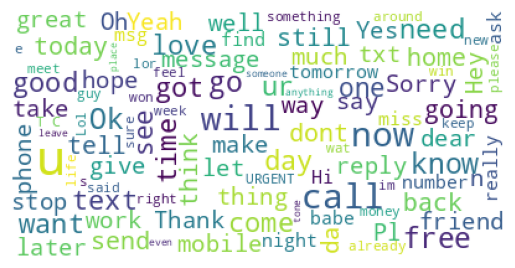

In [109]:
wordcloud=WordCloud(max_font_size=40, max_words=100, background_color='white').generate(all_text)
plt.imshow(wordcloud)
plt.axis('off')

In [112]:
from nltk.corpus import stopwords

In [128]:
#Remove stop words using NLKT
stop_wd_nltk=[]
for i in range(text.shape[0]):
    word_sep2=text['cleaned text'][i].split()
    stop_word_rem=[w for w in word_sep2 if not w in stopwords.words('english')]
    stop_word_rem=' '.join(stop_word_rem)
    stop_wd_nltk.append(stop_word_rem)

In [119]:
text['cleaned text']=stop_wd_nltk

In [120]:
text.head()

,index,type,text,cleaned text
0,0,ham,Hope you are having a good week. Just checking...,hope good checking
1,1,ham,K..going bacckk to stävänger,back stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,also dong cbe bt pay
3,3,ham,Are you this much buzy,much buy
4,4,ham,Please ask mummy to call father,please ask mummy call father


In [121]:
#Stop words using spaCy

In [123]:
#loading english module

en=spacy.load('en_core_web_sm')

In [124]:
#Collecting the stop words in spaCy
stop_words_spacy=en.Defaults.stop_words

In [125]:
stop_words_spacy

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [126]:
removed_stop_words=[]
for i in range(text.shape[0]):
  sep_text=text['cleaned text'][i].split()
  rem_stp=[word for word in sep_text if not word in stop_words_spacy]
  rem_stp=' '.join(rem_stp)
  removed_stop_words.append(rem_stp)
text['cleaned text']=removed_stop_words

In [127]:
text.head()

,index,type,text,cleaned text
0,0,ham,Hope you are having a good week. Just checking...,hope good checking
1,1,ham,K..going bacckk to stävänger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy
4,4,ham,Please ask mummy to call father,ask mummy father


Stemming: using PorterStemmer, LancasterStemmer and SnowballStemmer

In [129]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

In [130]:
ps=PorterStemmer()

In [131]:
ps_stemming=[]
for i in range(text.shape[0]):
  sep_text=text['cleaned text'][i].split()
  after_ps=[ps.stem(word) for word in sep_text]
  after_ps=' '.join(after_ps)
  ps_stemming.append(after_ps)
text['porter stemming']=ps_stemming

In [132]:
text.head()

,index,type,text,cleaned text,porter stemming
0,0,ham,Hope you are having a good week. Just checking...,hope good checking,hope good check
1,1,ham,K..going bacckk to stävänger,stranger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy,buy
4,4,ham,Please ask mummy to call father,ask mummy father,ask mummi father


In [133]:
#SnowballStemming
ss=SnowballStemmer('english')

In [136]:
snowball_stem=[]
for i in range(text.shape[0]):
  sep_text=text['cleaned text'][i].split()
  after_ss=[ss.stem(word) for word in sep_text]
  after_ss=' '.join(after_ss)
  snowball_stem.append(after_ss)
text['snowball stemming']=snowball_stem

In [137]:
text.head()

,index,type,text,cleaned text,porter stemming,snowball stemming
0,0,ham,Hope you are having a good week. Just checking...,hope good checking,hope good check,hope good check
1,1,ham,K..going bacckk to stävänger,stranger,stranger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy,buy,buy
4,4,ham,Please ask mummy to call father,ask mummy father,ask mummi father,ask mummi father


In [139]:
#Lancaster Stemming
from nltk.stem import LancasterStemmer

In [140]:
ls=LancasterStemmer()

In [143]:
lanc_stem=[]
for i in range(text.shape[0]):
  sep_text=text['cleaned text'][i].split()
  lan_st=[ls.stem(word) for word in sep_text]
  lan_st=' '.join(lan_st)
  lanc_stem.append(lan_st)
text['lancaster stemming']=lanc_stem

In [142]:
text.head()

,index,type,text,cleaned text,porter stemming,snowball stemming,Lancaster Stemming
0,0,ham,Hope you are having a good week. Just checking...,hope good checking,hope good check,hope good check,hop good check
1,1,ham,K..going bacckk to stävänger,stranger,stranger,stranger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy,buy,buy,buy
4,4,ham,Please ask mummy to call father,ask mummy father,ask mummi father,ask mummi father,ask mummy fath


Lemmatization

In [144]:
# Lemmatization using NLTK
lemmatizer=WordNetLemmatizer()

In [146]:
lemmatized=[]
for i in range(text.shape[0]):
  sep_text=text['cleaned text'][i].split()
  lemm=[lemmatizer.lemmatize(word) for word in sep_text]
  lemm=' '.join(lemm)
  lemmatized.append(lemm)
text['lemmatized(nltk)']=lemmatized

In [147]:
text.head()

,index,type,text,cleaned text,porter stemming,snowball stemming,Lancaster Stemming,lancaster stemming,lemmatized,lemmatized(nltk)
0,0,ham,Hope you are having a good week. Just checking...,hope good checking,hope good check,hope good check,hop good check,hop good check,hope good checking,hope good checking
1,1,ham,K..going bacckk to stävänger,stranger,stranger,stranger,stranger,stranger,stranger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy,buy,buy,buy,buy,buy,buy
4,4,ham,Please ask mummy to call father,ask mummy father,ask mummi father,ask mummi father,ask mummy fath,ask mummy fath,ask mummy father,ask mummy father


In [148]:
text.drop('lemmatized', axis=1, inplace=True)

In [149]:
text.head()

,index,type,text,cleaned text,porter stemming,snowball stemming,Lancaster Stemming,lancaster stemming,lemmatized(nltk)
0,0,ham,Hope you are having a good week. Just checking...,hope good checking,hope good check,hope good check,hop good check,hop good check,hope good checking
1,1,ham,K..going bacckk to stävänger,stranger,stranger,stranger,stranger,stranger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy,buy,buy,buy,buy,buy
4,4,ham,Please ask mummy to call father,ask mummy father,ask mummi father,ask mummi father,ask mummy fath,ask mummy fath,ask mummy father


In [158]:
#Lemmatization using spaCy
lemma_spacy=[]

for i in range(text.shape[0]):
  doc=nlp(text['cleaned text'][i])
  lemm=[]
  for token in doc:
    lemm.append(token.lemma_)
    lem_text=' '.join(lemm)
  lemma_spacy.append(lem_text)


In [159]:
text['lemmatized(spacy)']=lemma_spacy

In [160]:
text.head()

,index,type,text,cleaned text,porter stemming,snowball stemming,Lancaster Stemming,lancaster stemming,lemmatized(nltk),lemmatized(spacy)
0,0,ham,Hope you are having a good week. Just checking...,hope good checking,hope good check,hope good check,hop good check,hop good check,hope good checking,hope good checking
1,1,ham,K..going bacckk to stävänger,stranger,stranger,stranger,stranger,stranger,stranger,stranger
2,2,ham,Am also dong in cbe ony. Bt have to pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay,dong cbe bt pay
3,3,ham,Are you this much buzy,buy,buy,buy,buy,buy,buy,buy
4,4,ham,Please ask mummy to call father,ask mummy father,ask mummi father,ask mummi father,ask mummy fath,ask mummy fath,ask mummy father,ask mummy father


Model Building

In [161]:
cleaned_data=text.copy()

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
X=cleaned_data['lemmatized(nltk)']
y=cleaned_data['type']
X=pd.get_dummies(X, drop_first=True)

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [166]:
model=RandomForestClassifier(random_state=1)

In [167]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [170]:
y_pred=model.predict(X_test)

In [171]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.87      0.93       923
        spam       0.10      1.00      0.18        13

    accuracy                           0.87       936
   macro avg       0.55      0.94      0.56       936
weighted avg       0.99      0.87      0.92       936

